### Expressing the annual average solar exposition for a given latitude

In [223]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [224]:
plt.style.use('dark_background')

In [225]:
def dayly_exposure(O, phi, tau = 0.409):
    delta = tau * np.sin(O)
    T = np.tan(delta)*np.tan(phi)
    # Check if we have midnight sun
    t0 = 0
    if T >= 1:
        # The sun does not set 
        t0 = -np.pi
    elif T <= -1:
        # The sun does not rise
        return 0
    else:
        # Sunrise and sunset
        t0 = np.arccos(T)
    # if np.sin(O) > (np.pi - 2*phi) / (2*tau):
    #     return 0
    return 2 * ( t0 * np.sin(delta) * np.sin(phi) 
        + np.cos(delta) * np.cos(phi) * np.sin(t0)) 

In [226]:
# Get yearly average by summing over all days and dividing by 365
def yearly_exposure_sum(phi, tau = 0.409):
    year_expo = 0
    for O in np.linspace(0, 2*np.pi, 365):
        year_expo += dayly_exposure(O, phi, tau)
    
    return year_expo / 365


In [227]:
def yearly_approx(phi, S2 = -0.477):
    return 1 + S2 * 0.5 * (3 * np.sin(phi)**2 - 1)

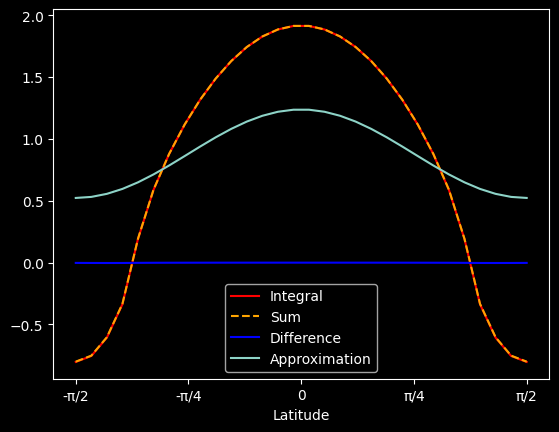

In [228]:
# Integrate over over the year
phi_list = np.linspace(-np.pi/2, np.pi/2, 30)

integral_list = np.zeros(len(phi_list))
yearly_approx_list = np.zeros(len(phi_list))
yearly_exposure_sum_list = np.zeros(len(phi_list))

for i, phi_enum in enumerate(phi_list):
    exposure = sp.integrate.quad(lambda O: dayly_exposure(O, phi_enum), -np.pi, np.pi, limit=100)
    integral_list[i] = exposure[0]*(1/(2*np.pi))
    yearly_approx_list[i] = yearly_approx(phi_enum)
    yearly_exposure_sum_list[i] = yearly_exposure_sum(phi_enum)

plt.plot(phi_list, integral_list, label = 'Integral', color = 'red')
plt.plot(phi_list, yearly_exposure_sum_list, label = 'Sum', linestyle = '--', color = 'orange')
plt.plot(phi_list, ((integral_list - yearly_exposure_sum_list)), label = 'Difference', color = 'blue')
plt.plot(phi_list, yearly_approx_list, label = 'Approximation')
plt.legend()
plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ['-π/2', '-π/4', '0', 'π/4', 'π/2'])
plt.xlabel('Latitude')
plt.show()

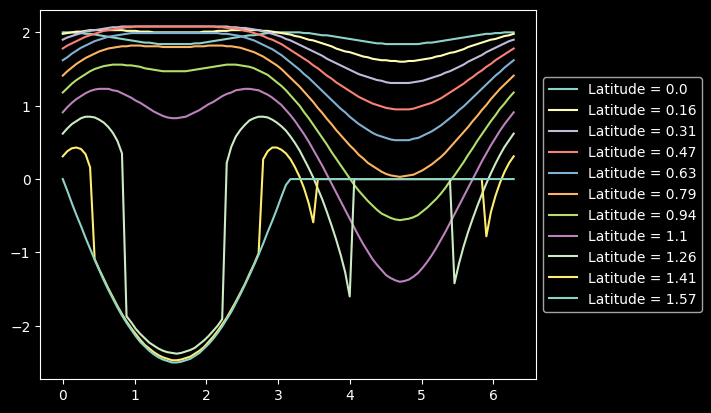

In [229]:
Orbit_list = np.linspace(0, 2*np.pi, 100)
# Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
Latitude_list = np.linspace(0, np.pi/2, 11)

fig, ax = plt.subplots()
for Latitude in Latitude_list:
    one_tatitude = [dayly_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    ax.plot(Orbit_list, np.round(one_tatitude, 2), label = f'Latitude = {np.round(Latitude, 2)}')
# plot legend on the outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


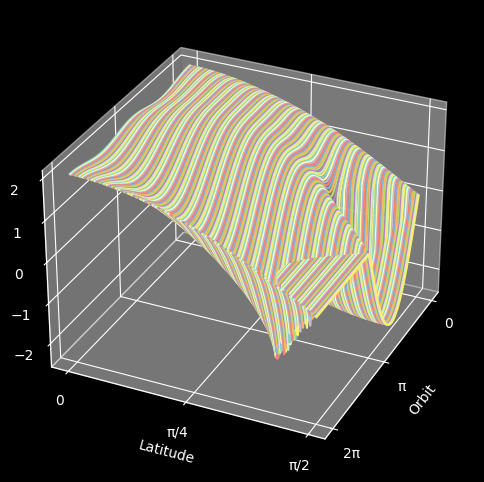

In [230]:
no_latitudes = 200
Orbit_list = np.linspace(0, 2*np.pi, 100)
# Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
Latitude_list = np.linspace(0, np.pi/2, no_latitudes)
no_latitudes_list = np.linspace(0, no_latitudes, no_latitudes)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, Latitude in enumerate(Latitude_list):
    one_tatitude = [dayly_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    ax.plot(Orbit_list, [i]*len(Orbit_list), one_tatitude, label = f'Latitude = {np.round(Latitude, 2)}')
ax.set_xlabel('Orbit')
plt.xticks([0, np.pi, 2*np.pi], ['0', 'π', '2π'])
ax.set_ylabel('Latitude')
plt.yticks([0, no_latitudes//2, no_latitudes], ['0', 'π/4', 'π/2'])
ax.set_zlabel('Exposure')
# rotate the plot
ax.view_init(30, 25)
fig.set_size_inches(6,6)
plt.show()
